# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

     |████████████████████████████████| 102 kB 488 kB/s ta 0:00:01


In [299]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [301]:
df = pd.read_csv('train.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [302]:
df = df.drop(columns='dropoff_datetime')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

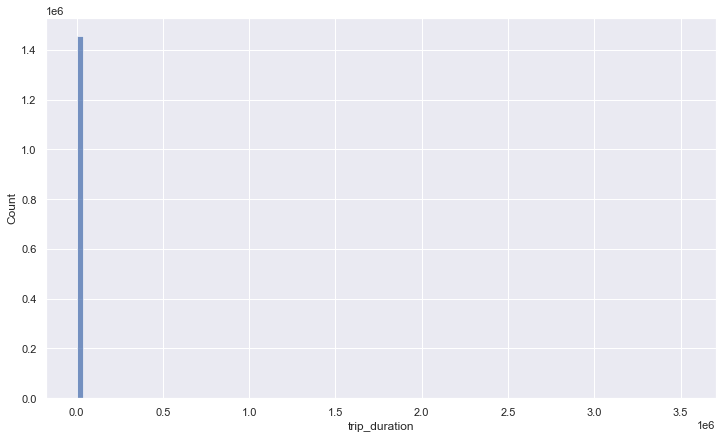

In [303]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='trip_duration', bins=100);

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: в данных есть выбросы, которые намного больше остальной части данных. 

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: из-за того, что в данных есть выбросы, а логорифм помогает уменьшить разрыв между значениями. 

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE (только, наверное, все-так RMSE) для модели $\hat{a}$.

**Доказательство**: 

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

$$\hat{y}_i = \log{(y_i + 1)}$$
$$a(x_i) = \exp(\hat{a}(x_i)) - 1$$

$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(\hat{a}(x_i)) - 1+1)}\big)^2}$$

$$\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}_i, \hat{a}(x_i))$$ 


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [304]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df1=df.drop(columns='trip_duration')
df1

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


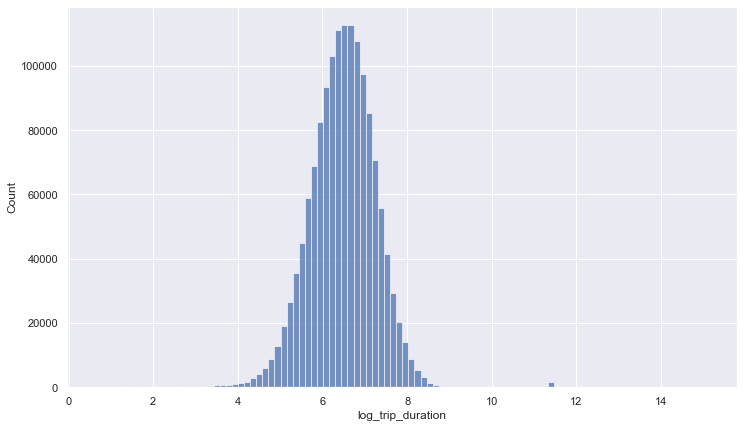

In [306]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df1, x='log_trip_duration', bins=100);

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [307]:
def rmsle(log1p_y_true, log1p_y_pred):
    np.sqrt(((sum(log1p_y_true - log1p_y_pred))**2)/len(log1p_y_true))
    raise NotImplementedError

rmsle_best_const = df1.log_trip_duration.mean()
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

6.466978409297406


AssertionError: 

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


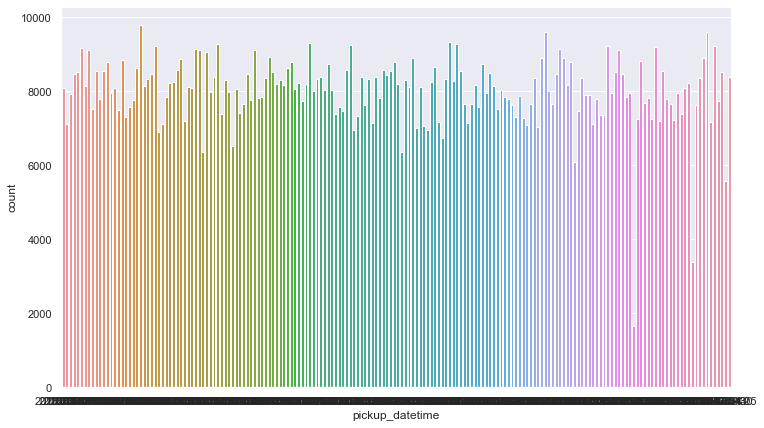

In [308]:
plt.figure(figsize=(12, 7))
sns.countplot(df1.pickup_datetime.dt.date);

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [309]:
anomalies = df1.pickup_datetime.dt.date.value_counts().sort_values()[:2]
anomalies

2016-01-23    1648
2016-01-24    3383
Name: pickup_datetime, dtype: int64

В эти даты в Нью-Йорке была ужасная метель

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x504 with 0 Axes>

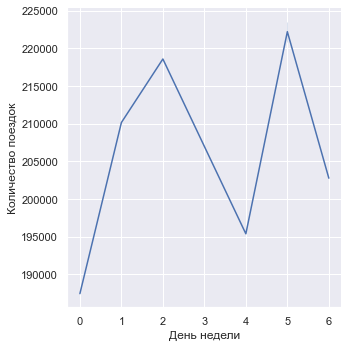

In [310]:
plt.figure(figsize=(12, 7))
sns.relplot(df1.pickup_datetime.dt.weekday, df1.pickup_datetime.dt.weekday.value_counts(), kind='line')
plt.xlabel('День недели')
plt.ylabel('Количество поездок');

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x504 with 0 Axes>

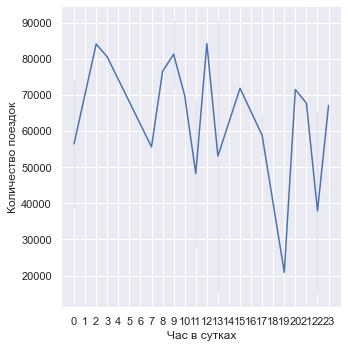

In [311]:
plt.figure(figsize=(12, 7))
sns.relplot(df1.pickup_datetime.dt.hour, df1.pickup_datetime.dt.hour.value_counts(), kind='line')
plt.xticks(np.arange(0, 24))
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок');

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [312]:
month_hour=pd.merge(df1.pickup_datetime.dt.hour, df1.pickup_datetime.dt.month, left_index=True, right_index=True)
month_hour_week=pd.merge(month_hour, df1.pickup_datetime.dt.weekday, left_index=True, right_index=True)
month_hour_week=month_hour_week.rename(columns={'pickup_datetime_x':'hour', 'pickup_datetime_y':'month', 'pickup_datetime':'week'})
month_hour_week

,hour,month,week
0,17,3,0
1,0,6,6
2,11,1,1
3,19,4,2
4,13,3,5
...,...,...,...
1458639,13,4,4
1458640,7,1,6
1458641,6,4,4
1458642,15,1,1


In [313]:
x=month_hour_week.groupby('hour')['month'].value_counts().unstack()
hour_month_count = x.stack().reset_index()
hour_month_count = hour_month_count.rename(columns={0:'count'})
hour_month_count

,hour,month,count
0,0,1,8330
1,0,2,8445
2,0,3,8992
3,0,4,9185
4,0,5,9146
...,...,...,...
139,23,2,11042
140,23,3,12172
141,23,4,12503
142,23,5,11928


<Figure size 864x504 with 0 Axes>

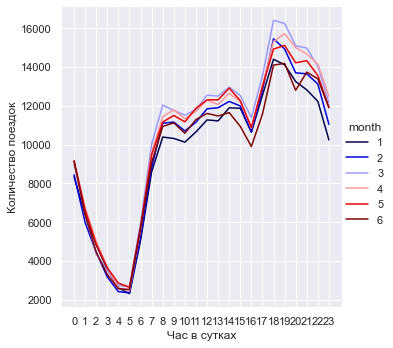

In [314]:
plt.figure(figsize=(12, 7))
sns.relplot(data=hour_month_count, x='hour', y='count', hue='month', kind='line', palette='seismic')
plt.xticks(np.arange(0, 24))
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок');

In [315]:
y=month_hour_week.groupby('hour')['week'].value_counts().unstack()
hour_week_count = y.stack().reset_index()
hour_week_count = hour_week_count.rename(columns={0:'count'})
hour_week_count

,hour,week,count
0,0,0,4299
1,0,1,4506
2,0,2,5327
3,0,3,6299
4,0,4,8779
...,...,...,...
163,23,2,9735
164,23,3,11715
165,23,4,13181
166,23,5,13166


<Figure size 864x504 with 0 Axes>

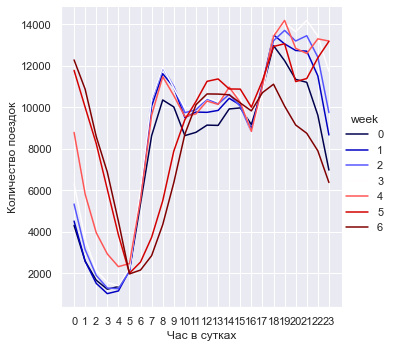

In [316]:
plt.figure(figsize=(12, 7))
sns.relplot(data=hour_week_count, x='hour', y='count', hue='week', kind='line', palette='seismic')
plt.xticks(np.arange(0, 24))
plt.xlabel('Час в сутках')
plt.ylabel('Количество поездок');

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Месяцы ведут себя почти что идентично. Касательно дней недели, в пятницу, субботу и воскресенье совершается намного больше поездок ночью до 5 часов, дальше с 5 до 11 в выходные дни совершается меньше поездок, чем в рабочие. После 11 утра графики ведут себя примерно одинаково. Что до общих тенденций, то минимум поездок приходиться на период с 2 до 5 часов ночи, а максимум поездок приходиться на 18-20. 

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [318]:
from sklearn.model_selection import train_test_split

y = df1.log_trip_duration

X = df1.drop(columns='log_trip_duration')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
941504,id0260330,1,2016-02-27 00:00:28,1,-74.005402,40.738270,-73.964195,40.684612,N
1026826,id3250315,2,2016-01-24 18:49:08,1,-73.988663,40.722675,-73.981293,40.747349,N
557691,id3099185,2,2016-01-08 07:38:04,1,-73.956551,40.813782,-73.959846,40.813782,N
315590,id2367263,1,2016-01-03 16:52:18,1,-73.953377,40.779442,-73.939804,40.794418,N
668766,id0923027,1,2016-04-22 22:46:43,1,-73.991302,40.726280,-73.994049,40.732548,N
...,...,...,...,...,...,...,...,...,...
836489,id0239022,1,2016-05-27 13:52:17,1,-73.952995,40.807659,-73.961861,40.804516,N
491263,id3001994,2,2016-05-14 19:13:33,6,-73.979683,40.749554,-74.005058,40.749725,N
470924,id3279589,1,2016-06-06 01:28:39,1,-73.992393,40.730476,-73.960243,40.657028,N
491755,id3108606,2,2016-06-09 13:00:32,6,-73.968094,40.751163,-73.959969,40.762409,N


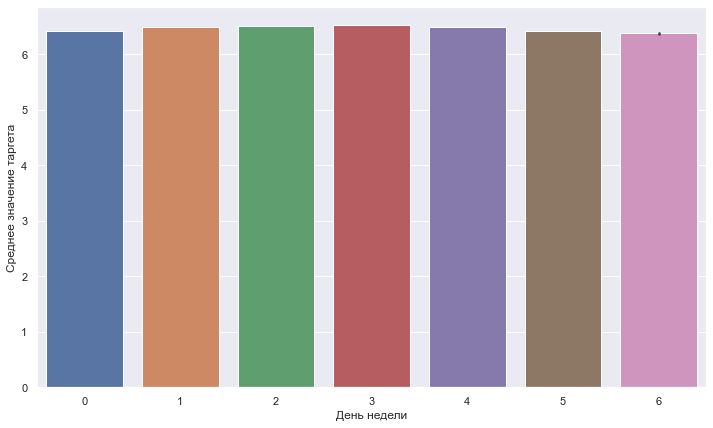

In [319]:
plt.figure(figsize=(12, 7))
sns.barplot(y=y_train, x=X_train.pickup_datetime.dt.weekday)
plt.xlabel('День недели')
plt.ylabel('Среднее значение таргета');

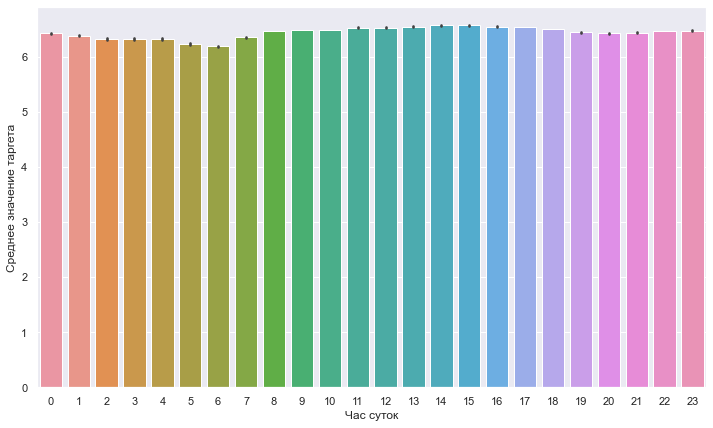

In [320]:
plt.figure(figsize=(12, 7))
sns.barplot(x=X_train.pickup_datetime.dt.hour, y=y_train)
plt.xlabel('Час суток')
plt.ylabel('Среднее значение таргета');

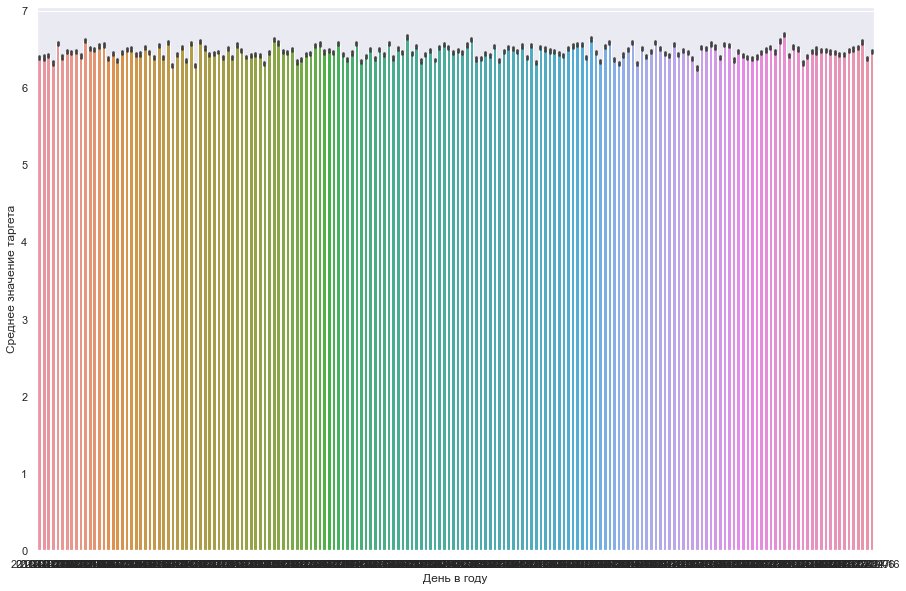

In [321]:
plt.figure(figsize=(15, 10))
sns.barplot(x=X_train.pickup_datetime.dt.date, y=y_train)
plt.xlabel('День в году')
plt.ylabel('Среднее значение таргета');

In [322]:
target_date = pd.merge(y_train, X_train.pickup_datetime.dt.date, left_index=True, right_index=True)
target_date = target_date.rename(columns={'pickup_datetime':'date'})
target_date_anomalies = target_date[target_date['date'].isin(anomalies.index)]
target_date_anomalies.groupby('date').mean()

,log_trip_duration
date,
2016-01-23,6.480587
2016-01-24,6.396184


**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Нет, графики не похожи. Все графики с таргетом очень сглажены, потому что берется среднее значение, к тому же от логарифма. Поэтому везде (для дней недели, месяцев, дат) среднее таргета примерно одинаково и равно 6-6.5. Для двух аномальных дней среднее логарифма также находится в диапазоне от 6 до 6.5 (как видно из таблицы строчкой выше). По-моему, никакого особого тренда на графике зависимости log_trip_duration от номера дня в году не наблюдается. 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [323]:
import datetime
datetime.date(2016, 1, 23)

datetime.date(2016, 1, 23)

In [324]:
(df1.pickup_datetime.dt.date == datetime.date(2016, 1, 23)).replace({True:1, False:0})

0          0
1          0
2          0
3          0
4          0
          ..
1458639    0
1458640    0
1458641    0
1458642    0
1458643    0
Name: pickup_datetime, Length: 1458644, dtype: int64

In [325]:
X_train['weekday'] = X_train.pickup_datetime.dt.weekday
X_train['month'] = X_train.pickup_datetime.dt.month
X_train['hour'] = X_train.pickup_datetime.dt.hour
X_train['is_2016_01_23'] = (X_train.pickup_datetime.dt.date == datetime.date(2016, 1, 23)).replace({True:1, False:0})
X_train['is_2016_01_24'] = (X_train.pickup_datetime.dt.date == datetime.date(2016, 1, 24)).replace({True:1, False:0})
X_train['day'] = X_train.pickup_datetime.dt.date


X_test['weekday'] = X_test.pickup_datetime.dt.weekday
X_test['month'] = X_test.pickup_datetime.dt.month
X_test['hour'] = X_test.pickup_datetime.dt.hour
X_test['is_2016_01_23'] = (X_test.pickup_datetime.dt.date == datetime.date(2016, 1, 23)).replace({True:1, False:0})
X_test['is_2016_01_24'] = (X_test.pickup_datetime.dt.date == datetime.date(2016, 1, 24)).replace({True:1, False:0})
X_test['day'] = X_test.pickup_datetime.dt.date

In [350]:
df1['weekday'] = df1.pickup_datetime.dt.weekday
df1['month'] = df1.pickup_datetime.dt.month
df1['hour'] = df1.pickup_datetime.dt.hour
df1['is_2016_01_23'] = (df1.pickup_datetime.dt.date == datetime.date(2016, 1, 23)).replace({True:1, False:0})
df1['is_2016_01_24'] = (df1.pickup_datetime.dt.date == datetime.date(2016, 1, 24)).replace({True:1, False:0})
df1['day'] = df1.pickup_datetime.dt.date

In [326]:
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,month,hour,is_2016_01_23,is_2016_01_24,day
941504,id0260330,1,2016-02-27 00:00:28,1,-74.005402,40.738270,-73.964195,40.684612,N,5,2,0,0,0,2016-02-27
1026826,id3250315,2,2016-01-24 18:49:08,1,-73.988663,40.722675,-73.981293,40.747349,N,6,1,18,0,1,2016-01-24
557691,id3099185,2,2016-01-08 07:38:04,1,-73.956551,40.813782,-73.959846,40.813782,N,4,1,7,0,0,2016-01-08
315590,id2367263,1,2016-01-03 16:52:18,1,-73.953377,40.779442,-73.939804,40.794418,N,6,1,16,0,0,2016-01-03
668766,id0923027,1,2016-04-22 22:46:43,1,-73.991302,40.726280,-73.994049,40.732548,N,4,4,22,0,0,2016-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,id0239022,1,2016-05-27 13:52:17,1,-73.952995,40.807659,-73.961861,40.804516,N,4,5,13,0,0,2016-05-27
491263,id3001994,2,2016-05-14 19:13:33,6,-73.979683,40.749554,-74.005058,40.749725,N,5,5,19,0,0,2016-05-14
470924,id3279589,1,2016-06-06 01:28:39,1,-73.992393,40.730476,-73.960243,40.657028,N,0,6,1,0,0,2016-06-06
491755,id3108606,2,2016-06-09 13:00:32,6,-73.968094,40.751163,-73.959969,40.762409,N,3,6,13,0,0,2016-06-09


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: Из новых признаков все стоит считать категориальными: weekday, month, hour, is_2016_01_23, is_2016_01_24, day. 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [327]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [328]:
# Кодируем категориальные признаки:

X_train_our_features = X_train[['weekday', 'month', 'hour', 'is_2016_01_23', 'is_2016_01_24', 'day']]
X_test_our_features = X_test[['weekday', 'month', 'hour', 'is_2016_01_23', 'is_2016_01_24', 'day']]
ohe = OneHotEncoder(sparse=False)
X_train_our_features_ohe = ohe.fit_transform(X_train_our_features)
X_test_our_features_ohe = ohe.transform(X_test_our_features)

/Users/olegchernikov/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [329]:
model = Ridge()
ridge = model.fit(X_train_our_features_ohe, y_train)
y_pred = ridge.predict(X_test_our_features_ohe)
y_pred

array([6.33312088, 6.47975348, 6.63403086, ..., 6.42207138, 6.4563411 ,
       6.71617412])

In [330]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.6184751353726031

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [331]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [332]:
show_circles_on_map(df1.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [333]:
show_circles_on_map(df1.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Аэропорт в Newark, John F. Kennedy International Airport, LaGuardia Airport. Все эти пункты являются аэропортами. Они достаточно сильно удалены от остальной массы точек. Следовательно, поездки на такси до них будут в среднем занимать больше времени и будут дороже.  

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [334]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [335]:
df1['haversine'] = haversine_array(df1['pickup_latitude'].values, df1['pickup_longitude'].values, 
                                  df1['dropoff_latitude'].values, df1['dropoff_longitude'].values)

In [336]:
df1['haversine']

0          1.498521
1          1.805507
2          6.385098
3          1.485498
4          1.188588
             ...   
1458639    1.225080
1458640    6.049836
1458641    7.824606
1458642    1.092564
1458643    1.134042
Name: haversine, Length: 1458644, dtype: float64

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [337]:
df1['log_haversine'] = np.log1p(df1['haversine'])
df1['log_haversine']

0          0.915699
1          1.031584
2          1.999464
3          0.910473
4          0.783257
             ...   
1458639    0.799793
1458640    1.953004
1458641    2.177544
1458642    0.738390
1458643    0.758018
Name: log_haversine, Length: 1458644, dtype: float64

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [338]:
your_df= df1
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

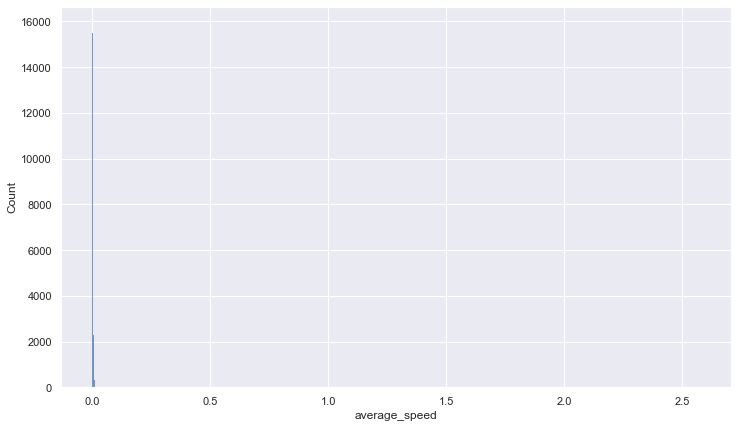

In [353]:
df1['average_speed'] = df1['haversine'] / df['trip_duration']
plt.figure(figsize=(12, 7))
sns.histplot(df1['average_speed']);

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

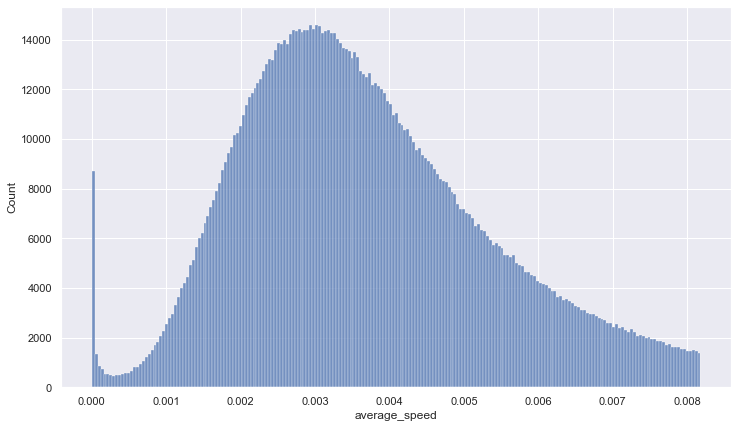

In [354]:
# удаляем числа большие 95 квантиля:
average_speed_95q = df1[df1['average_speed'] < np.quantile(df1['average_speed'], 0.95)]['average_speed']
plt.figure(figsize=(12, 7))
sns.histplot(average_speed_95q);

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [371]:
medians_data = df1.groupby(['weekday', 'hour'])['average_speed'].median().unstack().T
medians_data

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,0.005585,0.005239,0.004968,0.004806,0.004447,0.003919,0.003973
1,0.005620,0.005566,0.005402,0.005304,0.004816,0.004312,0.004275
2,0.005757,0.005672,0.005584,0.005524,0.005031,0.004524,0.004598
3,0.005738,0.006042,0.005774,0.005849,0.005272,0.004853,0.004887
4,0.006621,0.006446,0.006337,0.006298,0.005825,0.005299,0.005195
5,0.006548,0.006335,0.006283,0.006167,0.006303,0.006334,0.006136
6,0.005247,0.005020,0.005075,0.005106,0.005211,0.006131,0.006620
7,0.004023,0.003745,0.003742,0.003754,0.003850,0.005435,0.005934
8,0.003190,0.002886,0.002918,0.002888,0.002998,0.004748,0.005163


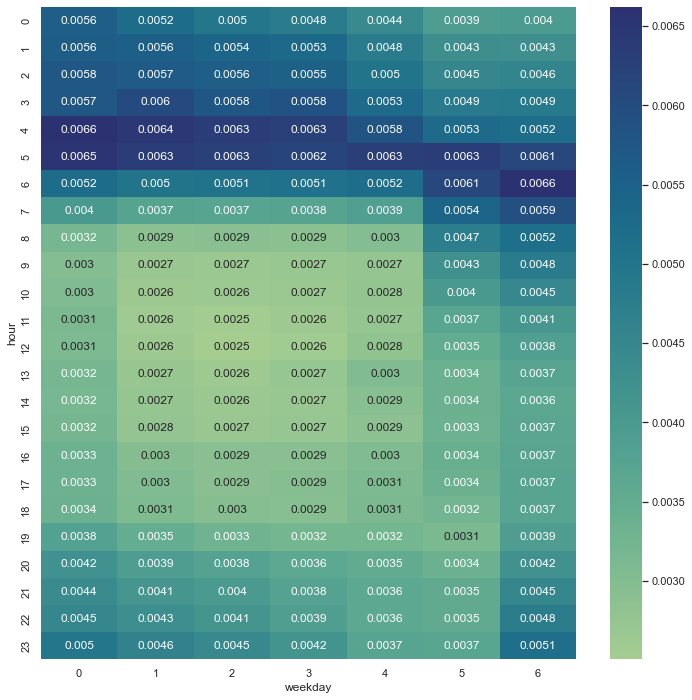

In [376]:
plt.figure(figsize=(12, 12))
sns.heatmap(medians_data, annot=True, cmap="crest");

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что оно содерджит в себе целевую переменную. Это значит, что признак "значение скорости" будет напрямую связан с ней. Поэтому, если его оставить, при обучении алгоритм будет "подглядывать", то есть по сути будет знать ответы заранее. 

In [375]:
df2 = df1.drop(columns='average_speed')
df2

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,haversine,log_haversine,weekday,month,hour,is_2016_01_23,is_2016_01_24,day
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,1.498521,0.915699,0,3,17,0,0,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,1.805507,1.031584,6,6,0,0,0,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,6.385098,1.999464,1,1,11,0,0,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,1.485498,0.910473,2,4,19,0,0,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,1.188588,0.783257,5,3,13,0,0,2016-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011,1.225080,0.799793,4,4,13,0,0,2016-04-08
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161,6.049836,1.953004,6,1,7,0,0,2016-01-10
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876,7.824606,2.177544,4,4,6,0,0,2016-04-22
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256,1.092564,0.738390,1,1,15,0,0,2016-01-05


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость минимальна в рабочие дни, примерно с 7 утра до 7 вечера и равна примерно 0.003 (видимо, в это время больше всего машин на дороге, так как люди ездят на работу или на учебу, и возникают пробки). В выходные дни в это же время сокрость немного выше (в выходные машин поменьше). После 7 часов вечера скорость начинает расти во все дни недели (люди уже приехали домой). Такой рост наблюдается до 5-6 утра (ночью машин меньше всего). А в период с 4 до 6 утра скорость максимальна - около 0.0065. 

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [411]:
df2['traffic'] = ((df2['weekday'] < 4) & (df2['hour'] <= 18) & (df2['hour'] > 7)).replace({True:1, False:0})
df2['no_traffic'] = ((df2['hour'] <= 6) & (df2['hour'] >= 0)).replace({True:1, False:0})

In [412]:
df2

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,haversine,log_haversine,weekday,month,hour,is_2016_01_23,is_2016_01_24,day,traffic,no_traffic
0,id2875421,0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493,1.498521,0.915699,0,3,17,0,0,2016-03-14,1,0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282,1.805507,1.031584,6,6,0,0,0,2016-06-12,0,1
2,id3858529,0,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527,6.385098,1.999464,1,1,11,0,0,2016-01-19,1,0
3,id3504673,0,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785,1.485498,0.910473,2,4,19,0,0,2016-04-06,0,0
4,id2181028,0,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642,1.188588,0.783257,5,3,13,0,0,2016-03-26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,0,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,6.658011,1.225080,0.799793,4,4,13,0,0,2016-04-08,0,0
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,6.486161,6.049836,1.953004,6,1,7,0,0,2016-01-10,0,0
1458641,id2304944,0,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,6.639876,7.824606,2.177544,4,4,6,0,0,2016-04-22,0,1
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,5.924256,1.092564,0.738390,1,1,15,0,0,2016-01-05,1,0


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [413]:
place1 = "Newark Liberty International Airport"
latitude1 = 40.6895314
longitude1 = -74.17446239999998

place2 = 'John F. Kennedy International Airport'
latitude2 = 40.641766
longitude2 = -73.780968

place3 = 'LaGuardia Airport'
latitude3 = 40.7769271 
longitude3 = -73.87396590000003

In [440]:
df2['started_at_Newark_Airport'] = ((abs(df2['pickup_latitude']-latitude1) < 0.015) 
                                    & (abs(df['pickup_longitude']-longitude1) < 0.015)).replace({True:1, False:0})

In [441]:
df2['ended_at_Newark_Airport'] = ((abs(df2['dropoff_latitude']-latitude1) < 0.015) 
                                  & (abs(df['dropoff_longitude']-longitude1) < 0.015)).replace({True:1, False:0})

In [442]:
df2['started_at_Kennedy_Airport'] = ((abs(df2['pickup_latitude']-latitude2) < 0.015) 
                                    & (abs(df['pickup_longitude']-longitude2) < 0.015)).replace({True:1, False:0})

df2['ended_at_Kennedy_Airport'] = ((abs(df2['dropoff_latitude']-latitude2) < 0.015) 
                                  & (abs(df['dropoff_longitude']-longitude2) < 0.015)).replace({True:1, False:0})

df2['started_at_LaGuardia_Airport'] = ((abs(df2['pickup_latitude']-latitude3) < 0.015) 
                                    & (abs(df['pickup_longitude']-longitude3) < 0.015)).replace({True:1, False:0})

df2['ended_at_LaGuardia_Airport'] = ((abs(df2['dropoff_latitude']-latitude3) < 0.015) 
                                  & (abs(df['dropoff_longitude']-longitude3) < 0.015)).replace({True:1, False:0})

In [443]:
df2

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,...,is_2016_01_24,day,traffic,no_traffic,started_at_Newark_Airport,ended_at_Newark_Airport,started_at_Kennedy_Airport,ended_at_Kennedy_Airport,started_at_LaGuardia_Airport,ended_at_LaGuardia_Airport
0,id2875421,0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,6.122493,...,0,2016-03-14,1,0,0,0,0,0,0,0
1,id2377394,0,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,6.498282,...,0,2016-06-12,0,1,0,0,0,0,0,0
2,id3858529,0,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,7.661527,...,0,2016-01-19,1,0,0,0,0,0,0,0
3,id3504673,0,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,6.063785,...,0,2016-04-06,0,0,0,0,0,0,0,0
4,id2181028,0,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,6.077642,...,0,2016-03-26,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,0,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,6.658011,...,0,2016-04-08,0,0,0,0,0,0,0,0
1458640,id1049543,0,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,6.486161,...,0,2016-01-10,0,0,0,0,0,0,0,0
1458641,id2304944,0,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,6.639876,...,0,2016-04-22,0,1,0,0,0,0,0,0
1458642,id2714485,0,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,5.924256,...,0,2016-01-05,1,0,0,0,0,0,0,0


Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

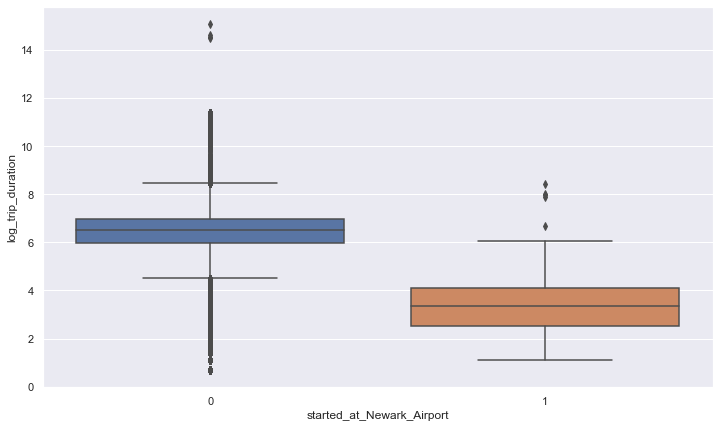

In [445]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='started_at_Newark_Airport', y='log_trip_duration');

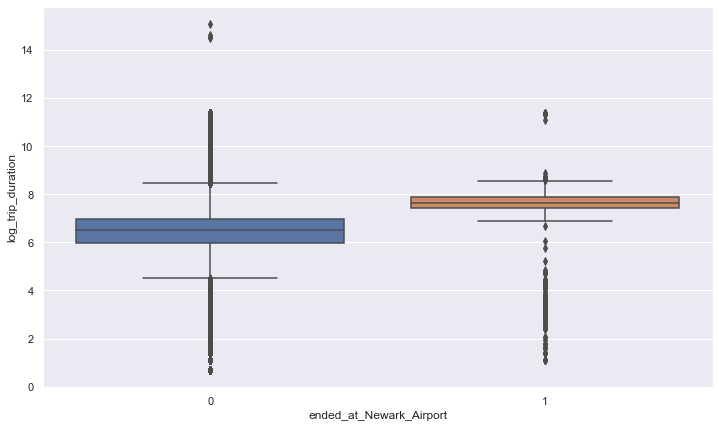

In [446]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='ended_at_Newark_Airport', y='log_trip_duration');

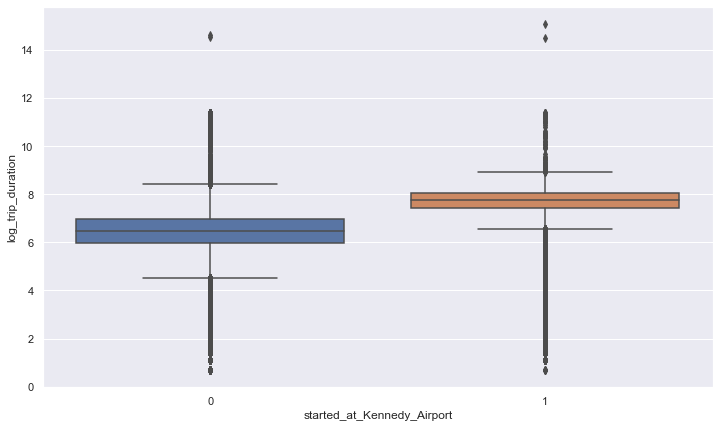

In [447]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='started_at_Kennedy_Airport', y='log_trip_duration');

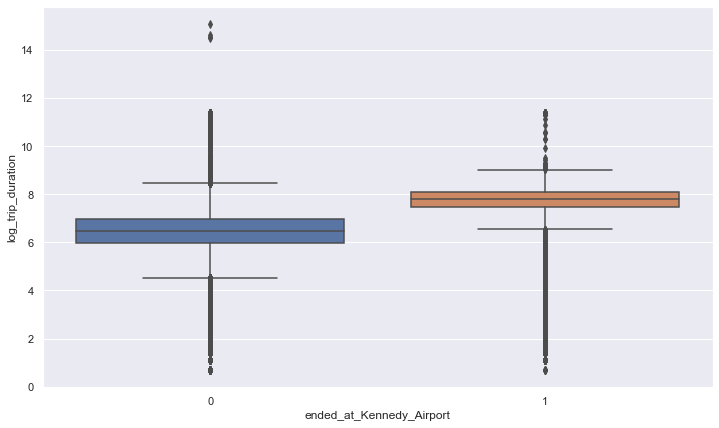

In [448]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='ended_at_Kennedy_Airport', y='log_trip_duration');

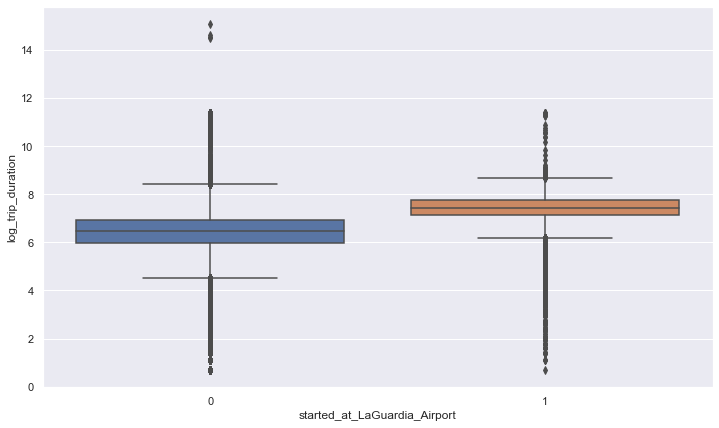

In [449]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='started_at_LaGuardia_Airport', y='log_trip_duration');

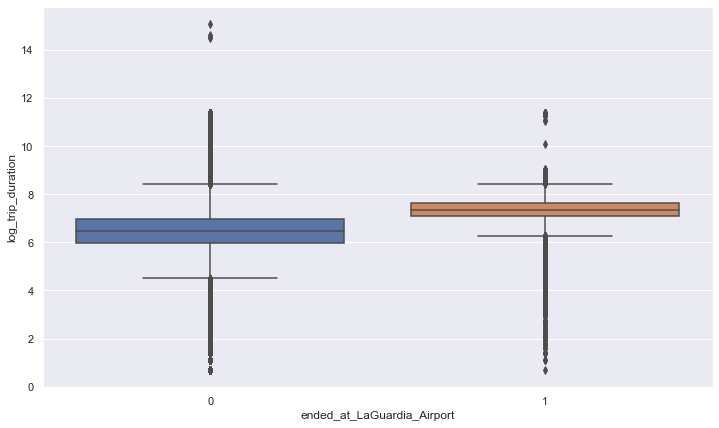

In [450]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, x='ended_at_LaGuardia_Airport', y='log_trip_duration');

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Судя по графикам, поездки, которые начинаются и заканчиваются в выделенных местах, в среднем дляться дольше. Поэтому это вполне хороший признаки. 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, ...):
        # your code here
        pass
    
    def show_map(self):
        # you may want to visualize cells
        pass
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        return X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [381]:
print(f'Количество уникальных значений vendor_id: {df2.vendor_id.nunique()}')
print(f'Количество уникальных значений passenger_count: {df2.passenger_count.nunique()}')
print(f'Количество уникальных значений store_and_fwd_flag: {df2.store_and_fwd_flag.nunique()}')

Количество уникальных значений vendor_id: 2
Количество уникальных значений passenger_count: 10
Количество уникальных значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

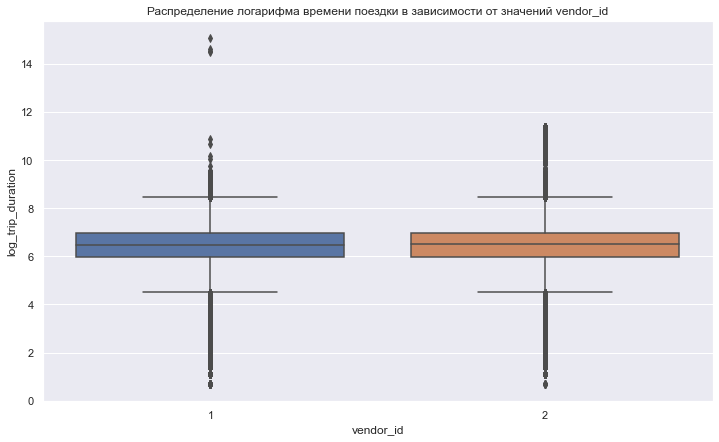

In [391]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, y='log_trip_duration', x='vendor_id')
plt.title('Распределение логарифма времени поездки в зависимости от значений vendor_id');

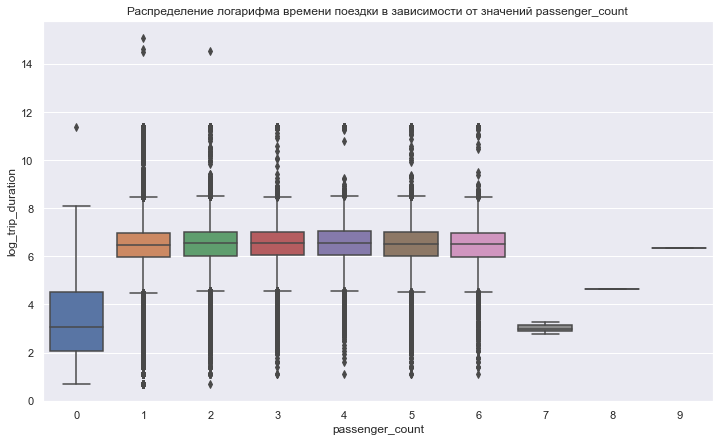

In [393]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, y='log_trip_duration', x='passenger_count')
plt.title('Распределение логарифма времени поездки в зависимости от значений passenger_count');

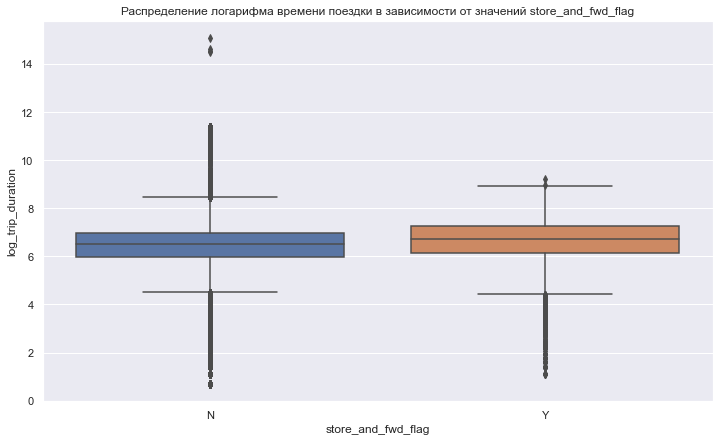

In [394]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df2, y='log_trip_duration', x='store_and_fwd_flag')
plt.title('Распределение логарифма времени поездки в зависимости от значений store_and_fwd_flag');

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [401]:
df2['vendor_id'] = df2['vendor_id'].replace({1:0, 2:1})
df2['store_and_fwd_flag'] = df2['store_and_fwd_flag'].replace({'N':0, 'Y':1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Скорее всего нет, так как распределение для всез значений этих признаков очень похожи, следовательно, из них нельзя сделать особых выводов по поводу целевой переменной. 

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.